# **ИДЗ №2**

In [ ]:
import sympy
from IPython.display import display, Latex
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from pprint import pprint
from scipy.stats import f
import numpy as np
from scipy import stats

## Задача №3

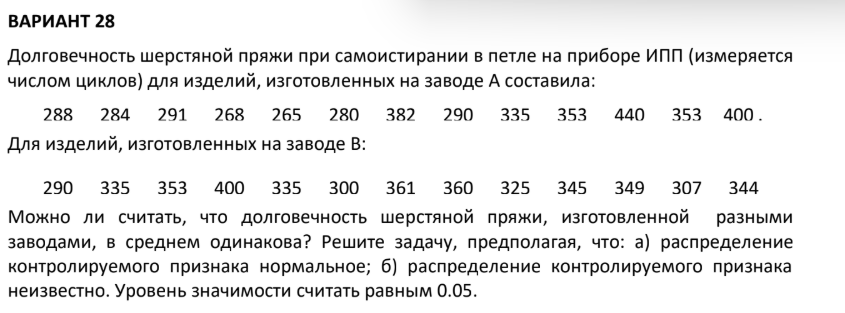

### а) Предполагем нормальное распределение -> можем использовать t-критерий Стьюдента, но только если дисперсии равны.

In [ ]:
A = [288, 284, 291, 268, 265, 280, 382, 290, 335, 353, 440, 353, 400]
m = len(A)
X_sum = sum(A)
X_bar = X_sum / m
X_sd = (sum([(value - X_bar) ** 2 for value in A]) / (m - 1))

B = [290, 335, 353, 400, 335, 300, 361, 360, 325, 345, 349, 307, 344]
n = len(B)
Y_sum = sum(B)
Y_bar = Y_sum / n
Y_sd = (sum([(value - Y_bar) ** 2 for value in B]) / (n - 1))

alpha = 0.05
# print(X_sd, Y_sd)

Проверка равенства дисперсий (критерий Фишера):

In [ ]:
F = X_sd/Y_sd

alpha = 0.05
df1 = 12
df2 = 12

In [ ]:
# Критические значения F для двустороннего теста на уровне 0.05
F_crit_upper = stats.f.ppf(1 - 0.05/2, df1, df2)
F_crit_lower = stats.f.ppf(0.05/2, df1, df2)

print(f"F-статистика: {F:.3f}")
print(f"Критическое значение F сверху: {F_crit_upper:.3f}")
print(f"Критическое значение F снизу: {F_crit_lower:.3f}")

if F_crit_lower < F < F_crit_upper:
    print("Гипотеза о равенстве дисперсий НЕ отвергается")
else:
    print("Гипотеза о равенстве дисперсий отвергается")

F-статистика: 3.741
Критическое значение F сверху: 3.277
Критическое значение F снизу: 0.305
Гипотеза о равенстве дисперсий отвергается


$F_{набл}$ > $F_{крит(upper)}$ -> дисперсии не равны.

Получается, критерий Стьюдента тут применить не сможем, так как дисперсии значимо различаются, тогда используем t-критерий Уэлча:

In [ ]:
# Вручную вычисляем
t_statistic = (X_bar - Y_bar) / np.sqrt(X_sd**2/m + Y_sd**2/n)

# Степени свободы по формуле Уэлча-Сатертвейта
df = round((X_sd**2/m + Y_sd**2/n)**2 / ((X_sd**2/m)**2/(m-1) + (Y_sd**2/n)**2/(n-1)))

# p-value для двустороннего теста
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print("Ручной расчет теста Уэлча:")
print("t_statistic =", round(t_statistic, 4))
print("df =", df)
print("p_value =", round(p_value, 4))
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различны.")
else:
    print("Не можем отвергать нулевую гипотезу: средние значения одинаковы.")
print()

# Проверка через встроенную функцию
t_statistic_check, p_value_check = stats.ttest_ind(A, B, equal_var=False)

print("Проверка через stats.ttest_ind:")
print("t_statistic =", round(t_statistic_check, 4))
print("p_value =", round(p_value_check, 4))
if p_value_check < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различны.")
else:
    print("Не можем отвергать нулевую гипотезу: средние значения одинаковы.")

Ручной расчет теста Уэлча:
t_statistic = -0.0148
df = 14
p_value = 0.9884
Не можем отвергать нулевую гипотезу: средние значения одинаковы.

Проверка через stats.ttest_ind:
t_statistic = -0.7655
p_value = 0.4539
Не можем отвергать нулевую гипотезу: средние значения одинаковы.


In [ ]:
# в виде исключения проверим и через критерий Стьюдента:
t_statistic = (X_bar - Y_bar) / (X_sd ** 2 / m + Y_sd ** 2 / n) ** .5
df = m + n - 2
p_value = stats.t.cdf(t_statistic, df)

print("t_statistic =", round(t_statistic, 4))
print("p_value = ", round(p_value, 4))
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различны.")
else:
    print("Не можем отвергать нулевую гипотезу: средние значения одинаковы.")
print()

print("Проверка через stats.ttest_ind:")
t_statistic, p_value = stats.ttest_ind(A, B)

print("t_statistic =", round(t_statistic, 4))
print("p_value = ", round(p_value, 4))
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различны.")
else:
    print("Не можем отвергать нулевую гипотезу: средние значения одинаковы.")

t_statistic = -0.0148
p_value =  0.4942
Не можем отвергать нулевую гипотезу: средние значения одинаковы.

Проверка через stats.ttest_ind:
t_statistic = -0.7655
p_value =  0.4515
Не можем отвергать нулевую гипотезу: средние значения одинаковы.


Вывод: Нулевая гипотеза не отвергается: средние значения не различаются.

### б) распределение неизвестно

Распределение неизвестно, значит используем критерий суммы рангов Вилкоксона


In [ ]:
Z = sorted(A + B)

ranks = {elem: rank for elem, rank in zip(Z, stats.rankdata(Z))}

R1 = sum([ranks[elem] for elem in A])
R2 = sum([ranks[elem] for elem in B])
U1 = m * n + (m * (m + 1)) / 2 - R1
U2 = m * n + (n * (n + 1)) / 2 - R2

u_statistic = min(U1, U2)

print("u_statistic =", u_statistic)

Z_bar = sum(Z) / len(Z)
Z_sd = (sum([(value - Z_bar) ** 2 for value in Z]) / (n + m)) ** .5
z_score = (X_bar - Z_bar) / (Z_sd / (m if u_statistic == U1 else n) ** .5)
z_score = abs(z_score)
z_critical = stats.norm.ppf(1 - alpha)

print("z_score =", round(z_score, 4))
print("z_critical = ", round(z_critical, 4))
if z_score > z_critical:
    print("Отвергаем нулевую гипотезу: средние значения различны.")
else:
    print("Не можем отвергать нулевую гипотезу: средние значения одинаковы.")
print()

print("Проверка:")
u_statistic, p_value = stats.mannwhitneyu(A, B)

print("u_statistic =", round(u_statistic, 4))
print("p_value = ", round(p_value, 4))
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различны.")
else:
    print("Не можем отвергать нулевую гипотезу: средние значения одинаковы.")

u_statistic = 63.0
z_score = 0.5566
z_critical =  1.6449
Не можем отвергать нулевую гипотезу: средние значения одинаковы.

Проверка:
u_statistic = 63.0
p_value =  0.2807
Не можем отвергать нулевую гипотезу: средние значения одинаковы.


Вывод: результаты с проверкой сходится и нулевая гипотеза не отвергается: средние значения одинаковы\.

## Итоговые выводы

Таким образом, независимо от характера распределения данных:

Долговечность шерстяной пряжи, произведённой на заводах А и В, может считаться одинаковой на уровне значимости 0.05.